<a href="https://colab.research.google.com/github/oussemachihi70-blip/my-projects/blob/main/malaria%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from random import*
import matplotlib.pyplot as plt


In [2]:
!pip install tensorflow
!pip install keras

## loading the dataset

In [3]:
import kagglehub
path = kagglehub.dataset_download("iarunava/cell-images-for-detecting-malaria")

Using Colab cache for faster access to the 'cell-images-for-detecting-malaria' dataset.


# Task
Preprocess the image data from the "cell-images-for-detecting-malaria" dataset located at `'/kaggle/input/cell-images-for-detecting-malaria'`, by loading images from the 'uninfected' and 'parasitized' subfolders, resizing them to a uniform size (e.g., 100x100 pixels), converting them into numerical arrays with corresponding labels, splitting the data into training and testing sets, and normalizing the pixel values. Finally, provide the shapes of `X_train`, `X_test`, `y_train`, and `y_test`.

## Prepare Image Data

### Subtask:
Load images from the 'uninfected' and 'parasitized' subfolders, resize them to a uniform size (e.g., 100x100 pixels), convert them into numerical arrays, and create corresponding labels.


**Reasoning**:
The previous code failed because the specified path for X_train.txt was incorrect. The current subtask requires loading and processing image files directly from the dataset. Therefore, I need to implement the detailed instructions to load images, resize them, convert them to arrays, and create corresponding labels. I will start by importing the necessary libraries and then proceed with the image loading and preprocessing steps as outlined.



In [4]:
import os
import cv2
import numpy as np
import random

# Define the base directory for the dataset (from the kernel state)
# path = '/kaggle/input/cell-images-for-detecting-malaria' # This variable is already defined and available

# Construct the full paths to the 'uninfected' and 'parasitized' subfolders
base_image_dir = os.path.join(path, 'cell_images', 'cell_images')
uninfected_dir = os.path.join(base_image_dir, 'Uninfected')
parasitized_dir = os.path.join(base_image_dir, 'Parasitized')

# Initialize lists for storing image data and labels
data = []
labels = []

# Define the target image size
IMG_SIZE = 100

# Iterate through each category and its corresponding label
categories = {'Uninfected': 0, 'Parasitized': 1}

for category_name, label in categories.items():
    category_path = os.path.join(base_image_dir, category_name)
    print(f"Processing images in: {category_path}")
    for img_name in os.listdir(category_path):
        try:
            img_path = os.path.join(category_path, img_name)
            img = cv2.imread(img_path)
            if img is not None:
                # Convert BGR to RGB
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                # Resize image
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                # Append to data and labels lists
                data.append(img)
                labels.append(label)
        except Exception as e:
            print(f"Error loading image {img_name} in category {category_name}: {e}")

# Convert lists to NumPy arrays
data = np.array(data)
labels = np.array(labels)

print(f"Original data shape: {data.shape}")
print(f"Original labels shape: {labels.shape}")

# Combine image data and labels into a single list of tuples
combined_data = list(zip(data, labels))

# Shuffle the combined list to ensure randomness
random.shuffle(combined_data)

# Separate the shuffled data back into X (images) and y (labels) NumPy arrays
X = np.array([item[0] for item in combined_data])
y = np.array([item[1] for item in combined_data])

print(f"Shuffled X shape: {X.shape}")
print(f"Shuffled y shape: {y.shape}")
print("Image data loaded, processed, and labeled successfully.")

Processing images in: /kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected
Processing images in: /kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized
Original data shape: (27558, 100, 100, 3)
Original labels shape: (27558,)
Shuffled X shape: (27558, 100, 100, 3)
Shuffled y shape: (27558,)
Image data loaded, processed, and labeled successfully.


## Split Data

### Subtask:
Split the preprocessed image data (`X`) and labels (`y`) into training and testing sets (e.g., `X_train`, `X_test`, `y_train`, `y_test`) to prepare for model training and evaluation.


**Reasoning**:
To split the data into training and testing sets as per the subtask, I need to import the `train_test_split` function from `sklearn.model_selection` and then apply it to `X` and `y` with the specified parameters. Finally, I will print the shapes to verify the split.



In [5]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (22046, 100, 100, 3)
Shape of X_test: (5512, 100, 100, 3)
Shape of y_train: (22046,)
Shape of y_test: (5512,)


## Normalize Image Data

### Subtask:
Normalize the pixel values of the image data (e.g., scale to a range of 0 to 1) to ensure consistent input for the neural network.


**Reasoning**:
To normalize the image data, I will convert the data types of `X_train` and `X_test` to 'float32' and then divide their pixel values by 255.0 to scale them to the range [0, 1]. Finally, I will print their shapes to confirm.



In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255.0
X_test /= 255.0

print(f"Shape of normalized X_train: {X_train.shape}")
print(f"Shape of normalized X_test: {X_test.shape}")

Shape of normalized X_train: (22046, 100, 100, 3)
Shape of normalized X_test: (5512, 100, 100, 3)


##model

In [7]:
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=32,epochs=3,validation_split=0.1)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
621/621 ━━━━━━━━━━━━━━━━━━━━ 458s 735ms/step - accuracy: 0.5872 - loss: 0.6585 - val_accuracy: 0.9107 - val_loss: 0.2261
Epoch 2/3
621/621 ━━━━━━━━━━━━━━━━━━━━ 462s 744ms/step - accuracy: 0.9241 - loss: 0.2134 - val_accuracy: 0.9465 - val_loss: 0.1670
Epoch 3/3
621/621 ━━━━━━━━━━━━━━━━━━━━ 459s 739ms/step - accuracy: 0.9449 - loss: 0.1620 - val_accuracy: 0.9456 - val_loss: 0.1629


In [8]:
model.evaluate(X_test,y_test)

173/173 ━━━━━━━━━━━━━━━━━━━━ 34s 195ms/step - accuracy: 0.9417 - loss: 0.1713


[0.1798999011516571, 0.9408563375473022]

## make predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
parasitized


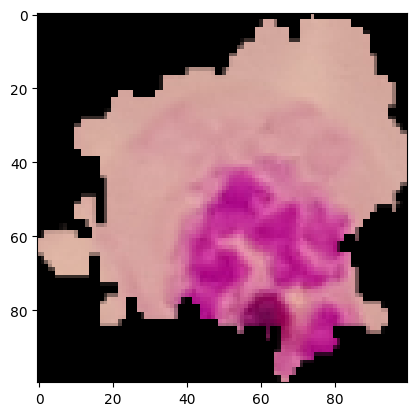

In [9]:
idx2=random.randint(0,len(X_test))
img=X_test[idx2]
plt.imshow(img)
img=img.reshape(1,100,100,3)
prediction=model.predict(img)
if prediction>0.5:
  print("parasitized")
else:
  print("uninfected")
